<h1 align='center'> COMP2420/COMP6420 - Introduction to Data Management,<br/> Analysis and Security</h1>

<h1 align='center'> Assignment - 2</h1>

-----

|**Maximum Marks**         |**100**
|--------------------------|--------
|  **Weight**              |  **15% of the Total Course Grade**
|  **Submission deadline** |  **8:00PM, Sunday, May 23th**
|  **Submission mode**     |  **Electronic, Using GitLab**
|  **Penalty**             |  **100% after the deadline**


## Learning Outcomes
The following learning outcomes apply to this piece:
- **LO1** - Demonstrate a conceptual understanding of database systems and architecture, data models and declarative query languages
- **LO2** - Define, query and manipulate a relational database
- **LO3** - Demonstrate basic knowledge and understanding of descriptive and predictive data analysis methods, optimization and search, and knowledge representation.
- **LO4** - Formulate and extract descriptive and predictive statistics from data
- **LO5** - Analyse and interpret results from descriptive and predictive data analysis
- **LO6** - Apply their knowledge to a given problem domain and articulate potential data analysis problems
- **LO7** - Identify potential pitfalls, and social and ethical implications of data science
- **LO8** - Explain key security concepts and the use of cryptographic techniques, digital signatures and PKI in security


## Submission

You need to submit the following items:
- The notebook `Assignment-2.ipynb` 
- A completed `statement-of-originality.md`, found in the root of the forked gitlab repo.

Submissions are performed by pushing to your forked GitLab assignment repository. For a refresher on forking and cloning repositories, please refer to `Lab 1`. Issues with your Git repo (with the exception of a CECS/ANU wide Gitlab failure) will not be considered as grounds for an extension. Any variation of this will result in a `zero mark`.

***** 

### Notes:

* It is strongly advised to read the whole assignment before attempting it and have at least a cursory glance at the dataset in order to gauge the requirements and understand what you need to do as a bigger picture.
* Backup your assignment to your Gitlab repo often. 
* Extra reading and research will be required. Make sure you include all references in your Statement of Originality. If this does not occur, at best marks will be deduced. Otherwise, academic misconduct processes will be followed.
* For answers requiring free form written text, use the designated cells denoted by `YOUR WRITTEN ANSWER HERE` -- double click on the cell to write inside them.
* For all coding questions please write your code after the comment `YOUR CODE HERE`.
* In the process of testing your code, you can insert more cells or use print statements for debugging, but when submitting your file remember to remove these cells and calls respectively. You are welcome to add additional cells to the final submission, provided they add value to the overall piece.
* Your code answers will be marked on **correctness** and **readability** of your code, if your marker can't understand your code your marks may be deducted. 
* Your written answers will be marked on the **correctness**, **depth** and **clarity** of your written answers. If your marker cannot understand your answer, marks may be deducted
* Before submitting, restart the kernel in Jupiter Lab and re-run all cells before submitting your code. This will ensure the namespace has not kept any old variables, as these won't come across in submission and your code will not run. Without this, you could lose a significant number of marks.

*****

## Enter Your Student ID Below:

## Introduction

You have three (3) datasets to work with in this assignment, broken down as follows:

- Questions 1 and 2 - Transcoding Dataset
- Question 3 - SDSS
- Question 4 - SuperStore Database

Once again, the  dataset is a sizable dataset (roughly 8000 rows and 24 columns), so it is wise to consider your code in terms of complexity to ensure it doesn't take 30 minutes to run a single line.

Further reading on the datasets can be found in the following locations:
- [Transcoding Dataset.md](./data/cve/about.md)
- [Northwind Database.md](./data/bikestores/about.md)
- [SDSS Description](./data/SDSS_Description.txt)

****

In [1]:
# Code Imports
# Every Lab import is here, you may need to uncomment additional items as necessary.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
from sqlite3 import Error
from scipy import stats
from sklearn.linear_model import LogisticRegression     # Logistic Regression
from sklearn.neighbors import KNeighborsClassifier      # k-Nearest Neighbours
from sklearn.preprocessing import LabelEncoder          # encooding variables
from sklearn.preprocessing import StandardScaler        # encooding variables
from sklearn.model_selection import train_test_split    # testing our models
from sklearn.preprocessing import OneHotEncoder         # nominal variable
from sklearn.metrics import confusion_matrix            # scoring
from sklearn.tree import DecisionTreeClassifier         # decision trees
from sklearn.tree import DecisionTreeRegressor          # decision trees
from sklearn import tree                                # decision trees
from sklearn.decomposition import PCA                   # PCA 
from sklearn.cluster import KMeans                      # KMeans Clustering
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
# Import additional modules here as required
# It is unlikely that you would need any additional modules, however we had added space here just in case you feel 
#     extras are required. Note that some justification as to WHY you are using them should be provided.
#
# Note that only modules in the standard Anaconda distribution are allowed. If you need to install it manually, it is not an accepted package.

#GridSearchCV for Hyperparameter tuning of KNN & Decision Trees
from sklearn.model_selection import GridSearchCV

#Classification Report for KNN & Decision Trees
from sklearn.metrics import classification_report

#MinMaxScaler for Q2 transcoding_score scaling
from sklearn.preprocessing import MinMaxScaler


import warnings
warnings.filterwarnings("ignore")

#CrossValidation for KNN
from sklearn.model_selection import cross_val_score

****
## Q1: Clustering Videos for Transcoding <span style= 'float: right;'><b>[25 marks]</b></span>
Building off the dataset you initially encountered in Assignment 1, the Transcoding dataset has made a return for the following question.

The following question is designed to get you to load and process data and implement a clustering model for the given scenario below. You have been introduced to `KMeans` clustering in the lectures and labs, and this would therefore be the assumed clustering method, although you are welcome to supplement this with other clustering methods from the `sklearn` package as you desire.

You will first be asked to import and pre-process the data ready to implement a clustering model. Then, you are on your own in the world of clustering. Good luck!

### 1.1 Preprocessing <span style= 'float: right;'><b>[5 marks]</b></span>

To start, bring in the data and get it ready for clustering. Your tasks are:

1. Import the Data. The dataset is available in the location `data/transcoding_data.csv`.
2. Check the dataset for any missing values and account for them.
3. Prepare the data for a clustering task. You are welcome to use the data processing code that you wrote for the previous assignment.
    - Drop irrelevant and redundant columns. Also drop the columns `frames`, `category`, `size`, `o_bitrate`, `codec`, and `o_codec`.
    - Encode `o_resolution` as ordinal categorical variable with the order (176 x 144) $\prec$ (320 x 240) $\prec$ (480 x 360) $\prec$ (640 x 480) $\prec$ (1280 x 720) $\prec$ (1920 x 1080).
4. Provide descriptive statistics and display the first ten rows of the resulting dataset.

Descriptive statistics generally consists of count, mean, standard deviation, min, max, and interquartile measures.
The relation $a \prec b$ states that the variable $a$ precedes $b$.

In [3]:
#Importing the data
video_data = pd.read_csv('data/transcoding_data.csv')

#Checking for Null Values
print("Any Null Values?",video_data.isnull().values.any())

video_data_raw = video_data.copy()

#Dropping the asked columns as well as the redundant ones
#There are a high number of unique values in 'resolution', so instead of trying to map them we will just use 'width' & 'height'
video_data = video_data.drop(['id','url','frames','category','size','o_bitrate','codec','o_codec','resolution'], axis=1)

#Mapping o_resolution
resolution_mapping = {'176x144': 1, '320x240': 2, '480x360': 3, '640x480': 4, '1280x720': 5, '1920x1080': 6}
video_data['o_resolution'] = video_data['o_resolution'].map(resolution_mapping)

video_data_cleaned = video_data.copy()

Any Null Values? False


In [4]:
#Descriptive statistics
video_data.describe()

,duration,bitrate,width,height,framerate,i,p,b,o_framerate,o_width,o_height,o_resolution,umem,utime
count,4890.000000,4890.000000,4890.000000,4890.000000,4890.000000,4890.000000,4890.000000,4890.000000,4890.000000,4890.000000,4890.000000,4890.000000,4.890000e+03,4890.000000
mean,1277.353988,788.025767,570.453988,366.371370,22.944718,398.587935,28509.502045,116.459100,21.112239,795.762781,500.466258,3.481186,1.970159e+05,161.682508
std,1553.844302,1165.641217,451.848716,249.734926,7.945936,496.685941,36594.131433,157.709226,6.736176,607.671184,314.904115,1.705499,1.953843e+05,72.485720
min,1.000000,9.000000,128.000000,96.000000,0.000000,0.000000,12.000000,0.000000,12.000000,176.000000,144.000000,1.000000,3.970361e+03,0.752315
25%,405.000000,91.000000,176.000000,144.000000,12.000000,116.000000,7731.000000,29.000000,15.000000,320.000000,240.000000,2.000000,6.369268e+04,107.053476
50%,812.000000,347.000000,426.000000,240.000000,25.000000,247.000000,17229.500000,65.000000,24.000000,480.000000,360.000000,3.000000,1.309387e+05,154.767971
75%,1545.000000,836.750000,640.000000,480.000000,29.970000,495.000000,35079.750000,143.000000,25.000000,1280.000000,720.000000,5.000000,2.601301e+05,206.395924
max,25845.000000,14502.000000,1920.000000,1920.000000,49.420000,7032.000000,530243.000000,2329.000000,29.970000,1920.000000,1080.000000,6.000000,1.315594e+06,613.891350


In [5]:
#Displaying the first 10 rows
video_data.iloc[:10,:]

,duration,bitrate,width,height,framerate,i,p,b,o_framerate,o_width,o_height,o_resolution,umem,utime
0,267,373,568,320,29.97,102,7858,40,15.00,480,360,3,172247.935215,166.415727
1,267,324,400,226,29.97,130,7816,54,12.00,320,240,2,115355.838797,51.035704
2,267,85,176,144,12.00,43,3146,14,24.00,640,480,4,37827.340566,173.629478
3,31,1261,640,480,24.00,58,714,28,24.00,640,480,4,110002.908561,150.693204
4,31,370,320,240,24.00,61,674,8,29.97,1920,1080,6,77903.861755,278.413210
5,333,727,384,288,25.00,139,8157,27,15.00,480,360,3,90781.115843,130.548432
6,333,306,320,240,25.00,163,8119,42,24.00,1280,720,5,54266.504159,184.049056
7,333,91,176,144,12.00,57,3920,18,15.00,480,360,3,18842.877160,59.506751
8,67,633,854,480,29.92,26,1974,4,29.97,1920,1080,6,236610.816723,235.736431
9,67,302,400,224,29.92,52,1922,29,24.00,1920,1080,6,104387.945170,220.047137


### 1.2 K-Means Clustering Implementation <span style= 'float: right;'><b>[10 marks]</b></span>

Clustering helps visualise a dataset based on attributes considered important to the data scientist and/or reader.  Using the **Transcoding Dataset** above, implement a `K-Means clustering algorithm` to cluster the dataset of transcoded videos by using either all or a subset of the available features. Suppose you have used more than two features for your clustering; you are expected to reduce the dataset to either 2 or 3 dimensions.  After you have prepared your learning model, plot a **2D or 3D visualisation** showing the different clusters. 

It is up to you to decide how many clusters you would like to incorporate in your model. You are expected to **verbally and visually** justify your implementation, including the reasoning behind the choice of **the number of clusters** and **number of iterations** in your model. 

<span style='color:red;'><b>Note:</b> You are only allowed to use packages that are within the Anaconda distribution.</span>

In [6]:
#creating a copy of our processed data
video_kmeans = video_data.copy()

#scaling the entire dataset using Standard Scaler
scaler = StandardScaler()
scaler.fit(video_kmeans)
video_kmeans_scaled = scaler.transform(video_kmeans)
video_kmeans_scaled = pd.DataFrame(video_kmeans_scaled)
video_kmeans_scaled.columns = video_kmeans.columns

#I am using all the features from the processed data set, hence using PCA to reduce it to two dimensions 
pca = PCA(n_components=2)
video_kmeans_reduced = pca.fit_transform(video_kmeans_scaled)

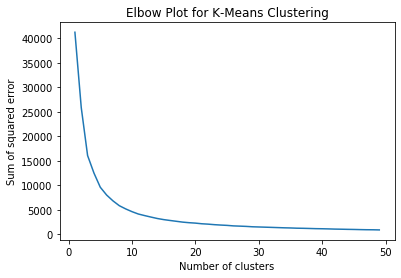

In [7]:
sse = []
k_rng = range(1,50)
for k in k_rng:
    km = KMeans(n_clusters=k,random_state=42)
    km.fit(video_kmeans_reduced)
    sse.append(km.inertia_)
plt.title("Elbow Plot for K-Means Clustering")
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse);

In [8]:
video_km = KMeans(n_clusters=7,random_state=42)
video_km = video_km.fit(video_kmeans_reduced)

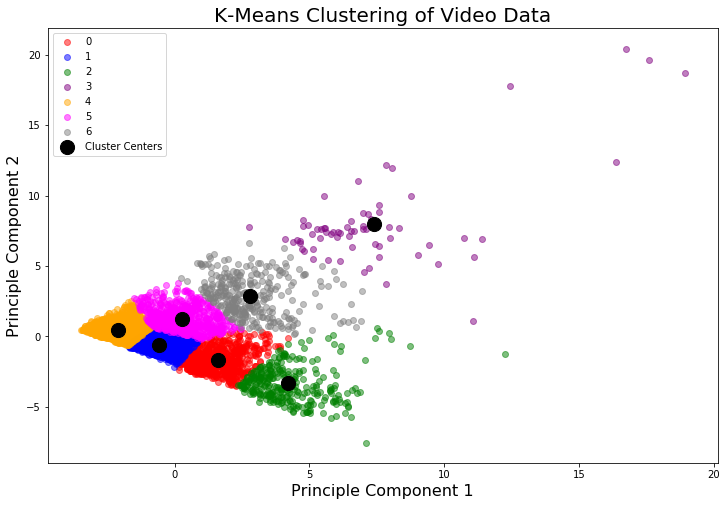

In [9]:
colors=["red","blue","green","purple","orange","magenta","grey"]

# plotting with different coloured clusters and showing cluster centres
plt.figure(figsize=(12,8))
for i in range(np.max(video_km.labels_)+1):
    plt.scatter(video_kmeans_reduced[video_km.labels_==i][:,0], video_kmeans_reduced[video_km.labels_==i][:,1], label=i, c=colors[i], alpha=0.5)
plt.scatter(video_km.cluster_centers_[:,0], video_km.cluster_centers_[:,1], label='Cluster Centers', c="black", s=200)
plt.title("K-Means Clustering of Video Data",size=20)
plt.xlabel("Principle Component 1", size=16)
plt.ylabel("Principle Component 2", size=16)
plt.legend()
plt.show()

In [10]:
def outlier_removal(dataset):
            #selecting only numeric values from the dataset
        video_data_numeric = dataset.select_dtypes(include=['float64','int64'])

        #getting z values for all of them
        threshold = 3
        z = np.abs(stats.zscore(video_data_numeric))

        #all the outlier indices
        z_outliers = np.where(z>3)

        print("Shape of our data set before outlier removal",dataset.shape)
        #Removing all the outliers from dataset

        #splitting data into numeric and categorical values, since only numeric values can check for outliers
        num_video = dataset.select_dtypes(include=["number"])
        cat_video = dataset.select_dtypes(exclude=["number"])

        #Checking for values with z score less than 3

        idx = np.all(stats.zscore(num_video) < 3, axis=1)

        #combinining the numeric and categorical data sets
        dataset = pd.concat([num_video.loc[idx], cat_video.loc[idx]], axis=1)

        print("Shape of our data set after outlier removal",dataset.shape)
        
        return dataset

In [11]:
#Removing outliers & scaling the new dataset using the same method as above
video_kmeans = outlier_removal(video_kmeans)

scaler = StandardScaler()
scaler.fit(video_kmeans)
video_kmeans_scaled = scaler.transform(video_kmeans)
video_kmeans_scaled = pd.DataFrame(video_kmeans_scaled)
video_kmeans_scaled.columns = video_kmeans.columns

pca = PCA(n_components=2)
video_kmeans_reduced = pca.fit_transform(video_kmeans_scaled)

Shape of our data set before outlier removal (4890, 14)
Shape of our data set after outlier removal (4573, 14)


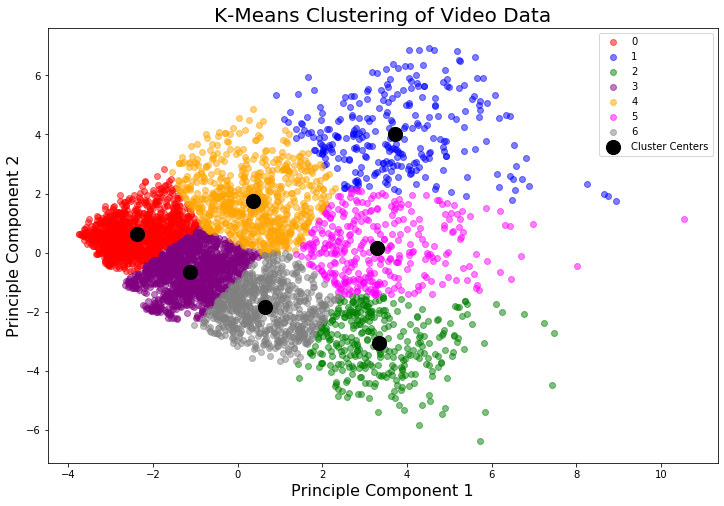

In [12]:
video_km = KMeans(n_clusters=7,random_state=42)
video_km = video_km.fit(video_kmeans_reduced)

colors=["red","blue","green","purple","orange","magenta","grey"]

# plotting with different coloured clusters and showing cluster centres
plt.figure(figsize=(12,8))
for i in range(np.max(video_km.labels_)+1):
    plt.scatter(video_kmeans_reduced[video_km.labels_==i][:,0], video_kmeans_reduced[video_km.labels_==i][:,1], label=i, c=colors[i], alpha=0.5)
plt.scatter(video_km.cluster_centers_[:,0], video_km.cluster_centers_[:,1], label='Cluster Centers', c="black", s=200)
plt.title("K-Means Clustering of Video Data",size=20)
plt.xlabel("Principle Component 1", size=16)
plt.ylabel("Principle Component 2", size=16)
plt.legend()
plt.show()

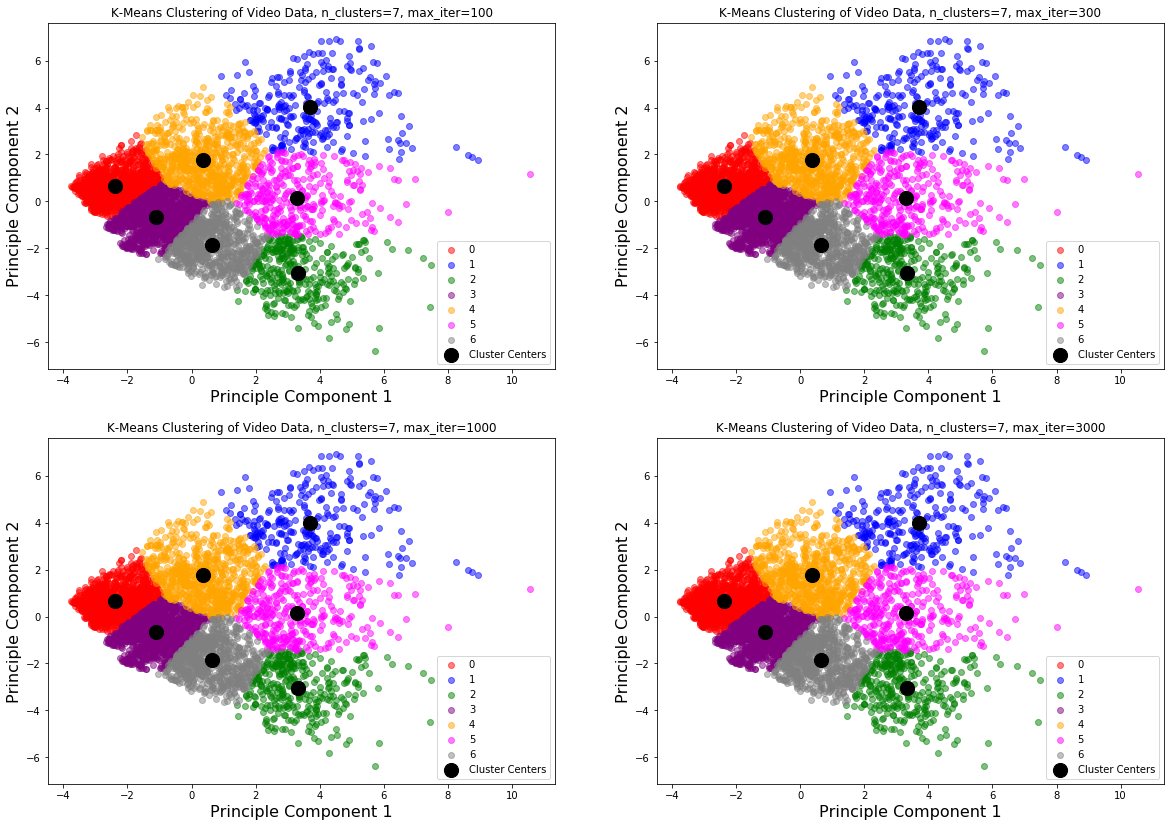

In [13]:
#Plotting 4 cluster plots for different values of max_iter
fig = plt.figure(figsize=(20,14))

for iterations, subplot in zip([100,300,1000,3000],[1,2,3,4]):
       video_km_loop = KMeans(n_clusters=7,random_state=42,max_iter=iterations)
       video_km_loop = video_km.fit(video_kmeans_reduced)

       colors=["red","blue","green","purple","orange","magenta","grey"]

       ax1 = fig.add_subplot(2,2,subplot)

       for i in range(np.max(video_km_loop.labels_)+1):
         plt.scatter(video_kmeans_reduced[video_km.labels_==i][:,0], video_kmeans_reduced[video_km_loop.labels_==i][:,1], label=i, c=colors[i], alpha=0.5)
       plt.scatter(video_km.cluster_centers_[:,0], video_km.cluster_centers_[:,1], label='Cluster Centers', c="black", s=200)
       plt.title("K-Means Clustering of Video Data, n_clusters=7, max_iter=" + str(iterations))
       plt.xlabel("Principle Component 1")
       plt.ylabel("Principle Component 2")
       
       plt.legend()

### 1.3 Analysing the Clusters <span style= 'float: right;'><b>[10 marks]</b></span>

With your clustering model complete, analyse the outputs in preparation for showing the results to the procurement team. Create a DataFrame for each cluster's data and identify their main attributes - how do these clusters differ from each other. Provide a brief commentary of the clustering model based on the analysis along with a visualisation of the mean `umem` and `utime` across the different clusters.

**Note:** Your analysis should include the mean and deviation of the continuous variables, mode of the categorical variables, and size of each cluster.

In [14]:
#removing outliers
video_data_nooutlier = outlier_removal(video_data_cleaned)

Shape of our data set before outlier removal (4890, 14)
Shape of our data set after outlier removal (4573, 14)


In [15]:
#Creating a dataframe for each cluster's data
k = np.max(video_km.labels_)+1
df_clusters = [video_data_nooutlier[video_km.labels_==i] for i in range(k)]

In [16]:
#we have to remap the o_resolution variable for dataframe
def re_classify(o_res_number):
    if (o_res_number==1):
        return '176x144'
    elif (o_res_number==2):
        return '320x240'
    elif (o_res_number==3):
        return '480x360'
    elif (o_res_number==4):
        return '640x480'
    elif (o_res_number==5):
        return '1280x720'
    else :
        return '1920x1080'

In [17]:

stat_dict = { 
    'Cluster' : list(range(k)),
    'Size' :    [len(df_clusters[i]) for i in range(k)],
    'Mean Duration' :   [round(df_clusters[i]['duration'].mean(), 2) for i in range(k)],
    'Std Duration' :    [round(df_clusters[i]['duration'].std(), 2) for i in range(k)],
    'Mean Bitrate' :   [round(df_clusters[i]['bitrate'].mean(), 2) for i in range(k)],
    'Std Bitrate' :    [round(df_clusters[i]['bitrate'].std(), 2) for i in range(k)],
    'Mean framerate' :   [round(df_clusters[i]['framerate'].mean(), 2) for i in range(k)],
    'Std framerate' :    [round(df_clusters[i]['framerate'].std(), 2) for i in range(k)],
    'Mean o_framerate' :   [round(df_clusters[i]['o_framerate'].mean(), 2) for i in range(k)],
    'Std o_framerate' :    [round(df_clusters[i]['o_framerate'].std(), 2) for i in range(k)],
    'Mean umem' :   [round(df_clusters[i]['umem'].mean(), 2) for i in range(k)],
    'Std umem' :    [round(df_clusters[i]['umem'].std(), 2) for i in range(k)],
    'Mean utime' :   [round(df_clusters[i]['utime'].mean(), 2) for i in range(k)],
    'Std utime' :    [round(df_clusters[i]['utime'].std(), 2) for i in range(k)],
    'Mode o_resolution' : [re_classify(df_clusters[i]['o_resolution'].value_counts()[:1].index.tolist()[0]) for i in range(k)]
}
df_cluster_stats = pd.DataFrame(stat_dict)
df_cluster_stats

,Cluster,Size,Mean Duration,Std Duration,Mean Bitrate,Std Bitrate,Mean framerate,Std framerate,Mean o_framerate,Std o_framerate,Mean umem,Std umem,Mean utime,Std utime,Mode o_resolution
0,0,1060,667.02,483.07,160.61,132.78,15.77,7.04,20.80,6.69,56001.48,34162.05,86.01,32.58,176x144
1,1,279,3572.71,816.51,483.19,434.30,26.62,5.29,21.11,6.74,271934.82,118805.27,194.83,50.44,640x480
2,2,330,832.64,463.71,2413.39,858.60,28.59,2.92,22.03,6.87,451516.58,141587.96,249.85,51.11,1920x1080
3,3,1222,545.46,405.33,386.28,307.89,22.24,7.99,21.13,6.68,89006.58,59468.75,143.99,39.80,1280x720
4,4,683,1937.66,834.45,357.94,295.52,23.16,7.68,20.71,6.92,180329.80,73773.62,136.64,42.94,176x144
5,5,330,1964.69,646.37,1218.35,867.97,28.14,3.53,21.32,6.71,400636.54,148632.90,221.43,48.19,1920x1080
6,6,669,582.36,355.65,958.32,781.25,26.81,5.41,21.09,6.67,188343.34,104265.77,199.80,41.30,1920x1080


In [18]:
df_cluster_logical = df_cluster_stats
df_cluster_logical.reindex([0,3,6,2,4,5,1])

,Cluster,Size,Mean Duration,Std Duration,Mean Bitrate,Std Bitrate,Mean framerate,Std framerate,Mean o_framerate,Std o_framerate,Mean umem,Std umem,Mean utime,Std utime,Mode o_resolution
0,0,1060,667.02,483.07,160.61,132.78,15.77,7.04,20.80,6.69,56001.48,34162.05,86.01,32.58,176x144
3,3,1222,545.46,405.33,386.28,307.89,22.24,7.99,21.13,6.68,89006.58,59468.75,143.99,39.80,1280x720
6,6,669,582.36,355.65,958.32,781.25,26.81,5.41,21.09,6.67,188343.34,104265.77,199.80,41.30,1920x1080
2,2,330,832.64,463.71,2413.39,858.60,28.59,2.92,22.03,6.87,451516.58,141587.96,249.85,51.11,1920x1080
4,4,683,1937.66,834.45,357.94,295.52,23.16,7.68,20.71,6.92,180329.80,73773.62,136.64,42.94,176x144
5,5,330,1964.69,646.37,1218.35,867.97,28.14,3.53,21.32,6.71,400636.54,148632.90,221.43,48.19,1920x1080
1,1,279,3572.71,816.51,483.19,434.30,26.62,5.29,21.11,6.74,271934.82,118805.27,194.83,50.44,640x480


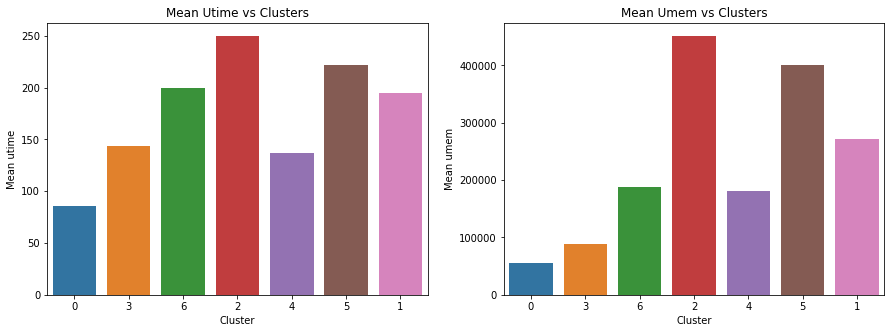

In [19]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
plt.title("Mean Utime vs Clusters")
sns.barplot(x=df_cluster_stats['Cluster'],y=df_cluster_stats['Mean utime'],order=[0,3,6,2,4,5,1]);


ax2= fig.add_subplot(1,2,2)
plt.title("Mean Umem vs Clusters")
sns.barplot(x=df_cluster_stats['Cluster'],y=df_cluster_stats['Mean umem'],order=[0,3,6,2,4,5,1]);

*****
## Q2: KNN Classification for Video Transcoding <span style= 'float: right;'><b>[20 marks]</b></span>

The rental company has decided that they want to use simple machine learning to allocate cost tags based on the transcoding score to the transcoded videos. The transcoding score can be obtained by taking the average of `umem` and `utime` and then normalizing it. The tags are as follows:


|  **Classification**      |  **Requirements**        |
|--------------------------|------------------------- |
|  Cheap                   |  Transcoding Score is between 0.0 and 0.3   |
|  Moderate                |  Transcoding Score is between 0.3 and 0.7 |
|  Expensive               |  Transcoding Score is between 0.7 and 1.0 |


**Note:** The `Classification` variable is an ordinal categorical variable whose ordering is Cheap $\prec$ Moderate $\prec$ Expensive where the relation $a \prec b$ states that the variable $a$ precedes $b$.




**Your task is to implement a `K-Nearest Neighbours Classification Algorithm` that can predict the transcoding score of a video**. 

You are required to perform the following tasks:

1. Use the same transcoding_data dataset as the previous question.
2. Modify the dataset to create the `Transcoding Score` column by manually determining the prediction class for existing data (where the rating is within the classification system defined above)
3. Implement an algorithm that can predict the `Transcoding Score` using the features present in the transcoding_data dataset.
4. Perform independent testing of the model and provide statistical metrics outlining the performance of your model. Splitting the dataset into testing and training subsets will assist with this.

You are welcome to use any features within the dataset, except the `umem` and `utime` of the transcoded video. Various attributes relating to the characteristics of the video and their respective transcoding settings in the tables can be helpful while making the algorithm. If required, you can also look to make new compound attributes that may be helpful in increasing the accuracy of your model.

You are expected to **verbally and visually (wherever approriate)** justify all aspects of your answer, including the features used, the metrics provided and the validation system employed. Provide commentary on the strengths and potential pitfalls of the model.

<span style='color:red;'><b>Note:</b> You are only allowed to use packages that are within the Anaconda distribution. This means packages such as Keras, Tensorflow etc are not available for use.</span> 

In [20]:
#Importing the data
video_knn = pd.read_csv('data/transcoding_data.csv')
video_knn.head()

,id,duration,codec,bitrate,width,height,resolution,framerate,frames,i,...,category,url,o_codec,o_bitrate,o_framerate,o_width,o_height,o_resolution,umem,utime
0,uDNj-_5ty48,267,h264,373,568,320,568x320,29.97,8001.99,102,...,Music,http://r2---sn-ovgq0oxu-5goe.c.youtube.com/vid...,mpeg4,5000000,15.00,480,360,480x360,172247.935215,166.415727
1,uDNj-_5ty48,267,flv1,324,400,226,400x226,29.97,8001.99,130,...,Music,http://r2---sn-ovgq0oxu-5goe.c.youtube.com/vid...,flv1,242000,12.00,320,240,320x240,115355.838797,51.035704
2,uDNj-_5ty48,267,mpeg4,85,176,144,176x144,12.00,3204.00,43,...,Music,http://r2---sn-ovgq0oxu-5goe.c.youtube.com/vid...,flv1,5000000,24.00,640,480,640x480,37827.340566,173.629478
3,WCgt-AactyY,31,h264,1261,640,480,640x480,24.00,744.00,58,...,People & Blogs,http://r1---sn-ovgq0oxu-5goe.c.youtube.com/vid...,mpeg4,820000,24.00,640,480,640x480,110002.908561,150.693204
4,WCgt-AactyY,31,flv1,370,320,240,320x240,24.00,744.00,61,...,People & Blogs,http://r1---sn-ovgq0oxu-5goe.c.youtube.com/vid...,flv1,5000000,29.97,1920,1080,1920x1080,77903.861755,278.413210


In [21]:
#Dropping redundant & categorical columns that are not useful 
video_knn = video_knn.drop(['id','url','resolution','category','codec','o_codec'], axis=1)

#Mapping the output resolution to convert it into a numerical variable 
resolution_mapping = {'176x144': 1, '320x240': 2, '480x360': 3, '640x480': 4, '1280x720': 5, '1920x1080': 6}
video_knn['o_resolution'] = video_knn['o_resolution'].map(resolution_mapping)

In [22]:
#Creating the 'transcoding score' column
#Taking the average & then scaling it with MinMaxScaler
video_knn['transcoding_score'] = (video_knn['umem'] + video_knn['utime'])/2
scaler = MinMaxScaler()
scaler.fit(video_knn[['transcoding_score']])
video_knn['transcoding_score']=scaler.transform(video_knn[['transcoding_score']])

#Function that will classify the 'transcoding score' column
#Cheap = 0, Moderate = 1, Expensive=2
def trans_tag(score):
    if ((score>=0) & (score<=0.3)):
        return 0
    elif ((score>0.3) & (score<=0.7)):
        return 1
    else :
        return 2
    
video_knn['transcoding_score'] = video_knn['transcoding_score'].map(trans_tag)
video_knn['transcoding_score'] = video_knn['transcoding_score'].astype(int)

#Dropping umem & utime since we dont need them anymore
video_knn = video_knn.drop(['umem','utime'], axis=1)

#Creating an unaltered copy for future use
video_knn_unaltered = video_knn.copy()

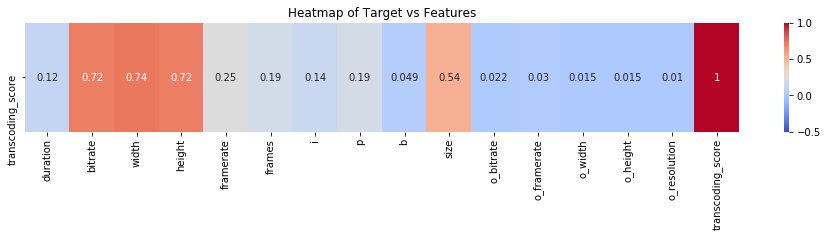

In [23]:
corrMatrix = video_knn.corr()
# Visualizing the correlation of all features with 'category'
plt.figure(figsize=(16, 2))
ax = sns.heatmap(corrMatrix[['transcoding_score']].transpose(), vmin = -0.5, annot=True,annot_kws={"size": 10},cmap='coolwarm');
ax.set_title("Heatmap of Target vs Features")
plt.show()

In [24]:
video_knn = video_knn[['bitrate','width','height','size','transcoding_score']]

In [25]:
#Splitting our data into training & testing sets
train_video, test_video = train_test_split(video_knn, test_size=0.2,random_state=43)

#Scaling the entire dataset using StandardScaler to have 0 mean & 1 std 
ss = StandardScaler()
ss.fit(train_video)
train_video_scaled = ss.transform(train_video)
test_video_scaled = ss.transform(test_video)
train_video_scaled = pd.DataFrame(train_video_scaled)
train_video_scaled.columns = train_video.columns

test_video_scaled = pd.DataFrame(test_video_scaled)
test_video_scaled.columns = test_video.columns

In [26]:
#setting the parameters & ranges for GridSearchCV
params = {'n_neighbors': range(1,20)}

#Initiating GridSearchCV to get the hyperparameter values
grid_search_cv = GridSearchCV(KNeighborsClassifier(), params,cv=3, n_jobs=-1)
grid_search_cv = grid_search_cv.fit(train_video_scaled.iloc[:,:-1],train_video.iloc[:,-1])
grid_search_cv.best_params_

{'n_neighbors': 6}

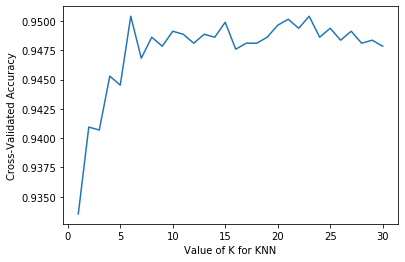

In [27]:
k_range = range(1, 31)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,train_video_scaled.iloc[:,:-1], train_video.iloc[:,-1],cv=3, scoring='accuracy')
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [28]:
knn = KNeighborsClassifier(n_neighbors=7)
knn_video_model = knn.fit(train_video_scaled.iloc[:,:-1], train_video.iloc[:,-1])

print("Training Score:", knn_video_model.score(train_video_scaled.iloc[:,:-1], train_video.iloc[:,-1]))
print("Testing Score: ", knn_video_model.score(test_video_scaled.iloc[:,:-1], test_video.iloc[:,-1]))

Training Score: 0.9542433537832311
Testing Score:  0.9468302658486708


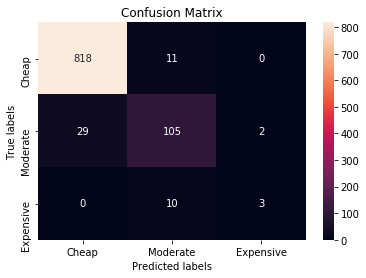

In [29]:
#Plotting a confusion matrix as a heatmap
y_pred = knn_video_model.predict(test_video_scaled.iloc[:,:-1])
cm = confusion_matrix(test_video.iloc[:,-1],y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.yaxis.set_ticklabels(['Cheap','Moderate','Expensive']); ax.xaxis.set_ticklabels(['Cheap','Moderate','Expensive']);

In [30]:
print(classification_report(test_video.iloc[:,-1],y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       829
           1       0.83      0.77      0.80       136
           2       0.60      0.23      0.33        13

    accuracy                           0.95       978
   macro avg       0.80      0.66      0.70       978
weighted avg       0.94      0.95      0.94       978



In [31]:
video_knn_unaltered['transcoding_score'].value_counts()

0    4227
1     611
2      52
Name: transcoding_score, dtype: int64

*****
## Q3: Decision Trees for Digital Sky <span style= 'float: right;'><b>[20 marks]</b></span>

The SDSS.csv data consists of 10,000 observations of space taken by the Sloan Digital Sky Survey, which offers public data of space observations. Every observation is described by 17 feature columns and 1 class column, which identifies it as either a star, galaxy or quasar.

To ease your start with the data, you can read the feature descriptions in the [SDSS Description](./data/SDSS_Description.txt) file.

**Your task is to implement a `Decision Tree Classification Algorithm` that can predict the `class` of an image**.

You are required to perform the following tasks:

1. Import the SDSS dataset and perform preprocessing as required.
2. Create a new feature (or column) called `category` by converting the nominal categorical variable `class` into an ordinal categorical variable based on the table presented below:

|  **class**      |  **category**        |
|--------------------------|------------------------- |
|  STAR                   |  0   |
|  GALAXY                |  1 |
|  QSO               |  2 |


3. Implement an algorithm that can predict the `category` using the features present in the SDSS dataset.
4. Perform independent testing of the model and provide statistical metrics outlining the performance of your model. Splitting the dataset into testing and training subsets will assist with this.
5.  Plot the resulting Decision Tree produced by the Tree-Building algorithm.

The QSO class refers to the quasi-stellar object, quasar. The order assigned to the `class` categorical variable is based on the brightness of the object, i.e. QSO is brighter than a GALAXY, and a GALAXY is brighter than a STAR.

You are welcome to use any features within the dataset, except the `class` of the SDSS data. If required, you can also look to make new compound attributes that may help increase the accuracy of your model. You are expected to **verbally and visually** justify all aspects of your answer, including the features used, the metrics provided and the validation system employed. Provide commentary on the strengths and potential pitfalls of the model.

<span style='color:red;'><b>Note:</b> You are only allowed to use packages that are within the Anaconda distribution. This means packages such as Keras, Tensorflow etc are not available for use.</span> 

In [32]:
sdss = pd.read_csv('data/SDSS.csv')
sdss.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [33]:
#Checking for Null Values, none found 
sdss.isnull().values.any()

False

In [34]:
#Creating the 'category' feature by mapping values on 'class' column
def classifier (class_type):
    if(class_type=='STAR'):
        return 0
    elif(class_type=='GALAXY'):
        return 1
    else:
        return 2
    
sdss['category'] = sdss['class'].map(classifier)

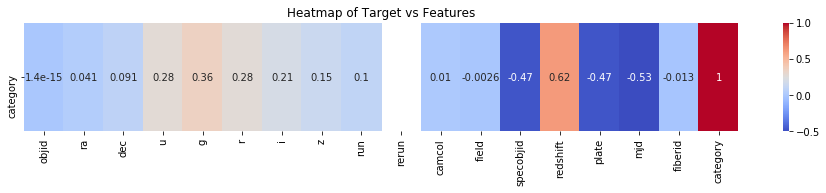

In [35]:
corrMatrix = sdss.corr()
# Visualizing the correlation of all features with 'category'
plt.figure(figsize=(16, 2))
ax = sns.heatmap(corrMatrix[['category']].transpose(), vmin = -0.5, annot=True,annot_kws={"size": 10},cmap='coolwarm');
ax.set_title("Heatmap of Target vs Features")
plt.show()

In [36]:
#From the above matrix we can observe that 
#1 - rerun value is not displayed

#upon analysis it is found that it is the same value for entire table, hence dropping it
print("Rerun has a single value",sdss['rerun'].unique(),", hence dropped")
sdss = sdss.drop(['rerun'],axis=1)

#2 - 'u', 'g' ,'r','i','z' are the 5 bands of telescope 
# & are related to each other, so making a compound variable out of them
sdss['bands_sum'] = sdss['u'] + sdss['r'] + sdss['g'] + sdss['i'] + sdss['z']

Rerun has a single value [301] , hence dropped


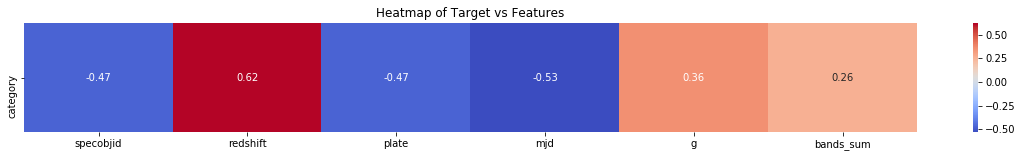

In [37]:
fig = plt.figure(figsize=(20,2))
#Splitting rows and columns for heatmap 
target = sdss[['category']]
features = sdss[['specobjid','redshift','plate','mjd','g','bands_sum']]

#combining the split data and applying .corr()
corr = pd.concat([target, features], axis=1, keys=['target', 'features']).corr().loc['target', 'features']

ax = sns.heatmap(corr,annot=True,cmap='coolwarm')

ax.set_title("Heatmap of Target vs Features")
plt.show()

In [38]:
#Splitting the data into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2,random_state=42)

#setting the parameters & ranges for GridSearchCV
params = {'min_samples_leaf': range(2,20), 'min_samples_split': range(2,20), 'max_depth' : range(1,10)}

#Initiating GridSearchCV to get the hyperparameter values
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params,cv=3, n_jobs=-1)
grid_search_cv = grid_search_cv.fit(X_train, y_train)
grid_search_cv.best_params_

{'max_depth': 3, 'min_samples_leaf': 13, 'min_samples_split': 2}

In [39]:
#Fitting the decision tree with the hyperparameter values from GridSearchCV
decision_tree = DecisionTreeClassifier(max_depth=3,min_samples_leaf=13,min_samples_split=2)
decision_tree.fit(X_train,y_train)

print("Training score", decision_tree.score(X_train,y_train))
print("Testing score", decision_tree.score(X_train,y_train))

Training score 0.98875
Testing score 0.98875


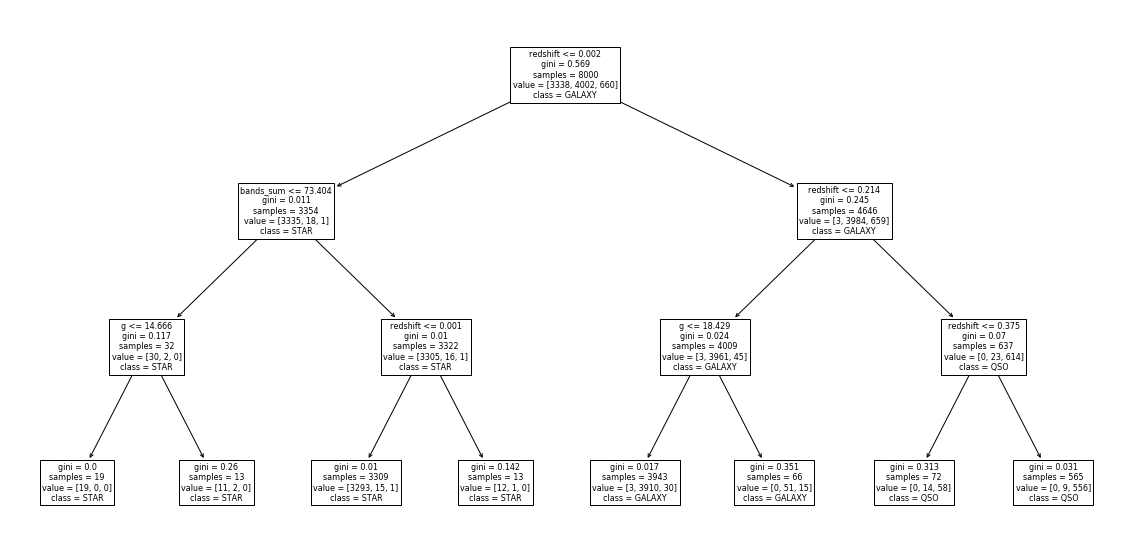

In [40]:
#Printing the resulting decision tree
fig = plt.figure(figsize=(20, 10))
tree.plot_tree(decision_tree, fontsize=8, feature_names=features.columns, class_names=['STAR','GALAXY','QSO'])
plt.show()

In [41]:
#Final Decision Tree
decision_tree = DecisionTreeClassifier(max_depth=2,min_samples_leaf=13,min_samples_split=2)
decision_tree.fit(X_train,y_train)

print("Training score", decision_tree.score(X_train,y_train))
print("Testing score", decision_tree.score(X_test,y_test))

Training score 0.98875
Testing score 0.9875


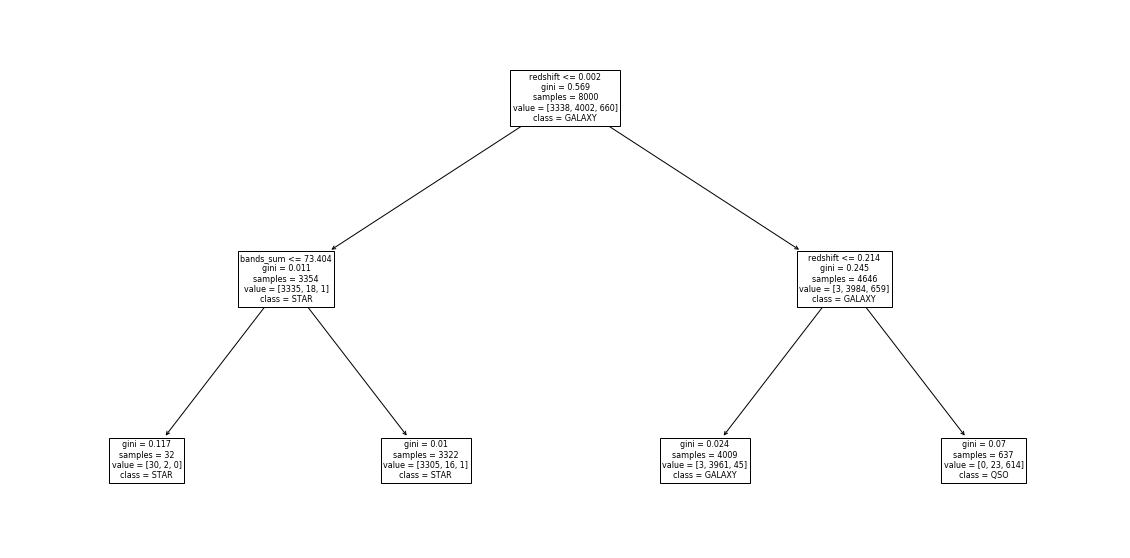

In [42]:
#Printing the resulting decision tree
fig = plt.figure(figsize=(20, 10))
tree.plot_tree(decision_tree, fontsize=8, feature_names=features.columns, class_names=['STAR','GALAXY','QSO'])
plt.show()

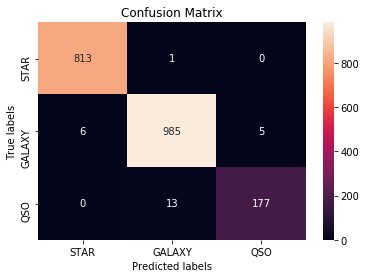

In [43]:
#Plotting a confusion matrix as a heatmap
y_pred = decision_tree.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.yaxis.set_ticklabels(['STAR','GALAXY','QSO']); ax.xaxis.set_ticklabels(['STAR','GALAXY','QSO']);

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       814
           1       0.99      0.99      0.99       996
           2       0.97      0.93      0.95       190

    accuracy                           0.99      2000
   macro avg       0.98      0.97      0.98      2000
weighted avg       0.99      0.99      0.99      2000



*****
## Q4: Serious SQL <span style= 'float: right;'><b>[20 marks]</b></span>
Consider the following scenario.

> You are applying for a job as a database developer for an unnamed wrestling company. Part of the job description includes creating an automation system for running SQL queries. During the hiring process, the interviewers want to ensure you understand the SQL language. They have provided a set of questions to be answered by you, and your responses will later be reviewed by them. They are unwilling to give you access to their real database (which is mysteriously missing), so they have provided an SQLite3 database and asked you to interact with it using Python. 


Based on the above scenario, you have been asked to answer a number of questions to test your skills. You will be using the Northwind database for this question. The database model is as follows:

![Northwind_Database](./img/er_diagram.png)

In the following questions, you will be asked to execute the SQL statement, and explain any reasoning as necessary. Data can be formatted as raw printed output or a Pandas DataFrame. Recall the use of the `fetchone` and `fetchall` functions on an sqlite cursor for retriving information.

In [45]:
# THIS IS YOUR CONNECTION BLOCK, DO NOT MODIFY THIS. 
# OTHERWISE, YOU WILL NOT BE ABLE TO READ THE DATABASE
def create_connection():
    """ create a database connection to a database that resides
        in the memory
    """
    conn = None
    try:
        conn = sqlite3.connect(':memory:')
        print("Connection established!")
        
    except Error as e:
        print("Error Connecting to Database")
        raise(e)
    return conn

northwind_sql = 'data/northwind.sql'
conn = create_connection() 
cur = conn.cursor()
qry = open(northwind_sql, 'r').read()
cur.executescript(qry)
conn.commit()
# remember to close the connection when everything is done

Connection established!


In [46]:
def execute_sql(query):
    # Select table and display
    cur.execute(query)

    # Fetches all the rows from the result of the query
    rows = cur.fetchall()
    
    # Gets the column names for the table
    colnames = [desc[0] for desc in cur.description]

    # Converts into readable pandas dataframe
    df_result = pd.DataFrame(rows, columns=colnames)
    return df_result

### 4.1: Customised Customers <span style= 'float: right;'><b>[3 marks]</b></span>

Retrieve the details of all the customers whose `ContactTitle` is Owner or is located in the `Country` Mexico. 

In [47]:
execute_sql("""SELECT * FROM Customers
           WHERE ContactTitle = 'Owner'
           or Country = 'Mexico'""")

,CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
0,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,None,05021,Mexico,(5) 555-4729,(5) 555-3745
1,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,None,05023,Mexico,(5) 555-3932,None
2,BOLID,Bólido Comidas preparadas,Martín Sommer,Owner,"C/ Araquil, 67",Madrid,None,28023,Spain,(91) 555 22 82,(91) 555 91 99
3,BONAP,Bon app',Laurence Lebihan,Owner,"12, rue des Bouchers",Marseille,None,13008,France,91.24.45.40,91.24.45.41
4,CENTC,Centro comercial Moctezuma,Francisco Chang,Marketing Manager,Sierras de Granada 9993,México D.F.,None,05022,Mexico,(5) 555-3392,(5) 555-7293
5,CHOPS,Chop-suey Chinese,Yang Wang,Owner,Hauptstr. 29,Bern,None,3012,Switzerland,0452-076545,None
6,DUMON,Du monde entier,Janine Labrune,Owner,"67, rue des Cinquante Otages",Nantes,None,44000,France,40.67.88.88,40.67.89.89
7,FOLKO,Folk och fä HB,Maria Larsson,Owner,Åkergatan 24,Bräcke,None,S-844 67,Sweden,0695-34 67 21,None
8,GROSR,GROSELLA-Restaurante,Manuel Pereira,Owner,5ª Ave. Los Palos Grandes,Caracas,DF,1081,Venezuela,(2) 283-2951,(2) 283-3397
9,LETSS,Let's Stop N Shop,Jaime Yorres,Owner,87 Polk St. Suite 5,San Francisco,CA,94117,USA,(415) 555-5938,None


### 4.2: Customers With No Orders <span style= 'float: right;'><b>[3 marks]</b></span>
There are some customers who have never actually placed an order. Show these customers.

In [48]:
execute_sql("""SELECT * FROM Customers
             WHERE NOT EXISTS (SELECT * FROM Orders WHERE
             Customers.CustomerID = Orders.CustomerID)""")

,CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
0,FISSA,FISSA Fabrica Inter. Salchichas S.A.,Diego Roel,Accounting Manager,"C/ Moralzarzal, 86",Madrid,None,28034,Spain,(91) 555 94 44,(91) 555 55 93
1,PARIS,Paris spécialités,Marie Bertrand,Owner,"265, boulevard Charonne",Paris,None,75012,France,(1) 42.34.22.66,(1) 42.34.22.77


### 4.3: Products & their Categories <span style= 'float: right;'><b>[3 marks]</b></span>

Count the total quantity sold for each products. Retrieve the `ProductID`, `ProductName`, `CategoryName`, and the total quantity sold as `Total Sold`.

In [49]:
execute_sql("""SELECT  p.ProductID,p.ProductName,
                c.CategoryName,sum(o.Quantity) as 'Total Sold'
                from 'Order Details' o
                JOIN Products p on p.ProductID=o.ProductID
                JOIN Categories c on p.CategoryID=c.CategoryID
                GROUP BY p.ProductID""")

,ProductID,ProductName,CategoryName,Total Sold
0,1,Chai,Beverages,828
1,2,Chang,Beverages,1057
2,3,Aniseed Syrup,Condiments,328
3,4,Chef Anton's Cajun Seasoning,Condiments,453
4,5,Chef Anton's Gumbo Mix,Condiments,298
...,...,...,...,...
72,73,Röd Kaviar,Seafood,293
73,74,Longlife Tofu,Produce,297
74,75,Rhönbräu Klosterbier,Beverages,1155
75,76,Lakkalikööri,Beverages,981


### 4.4: Products Above Average Price <span style= 'float: right;'><b>[3 marks]</b></span>

Retrieve the `ProductName` and `UnitPrice` of all the products whose price is greater than the average price of all the products.

In [50]:
execute_sql("""SELECT ProductName, UnitPrice from Products
              WHERE UnitPrice > (SELECT AVG(UnitPrice) from Products)
              ORDER BY UnitPrice""")

,ProductName,UnitPrice
0,Uncle Bob's Organic Dried Pears,30.00
1,Ikura,31.00
2,Gumbär Gummibärchen,31.23
3,Mascarpone Fabioli,32.00
4,Perth Pasties,32.80
5,Wimmers gute Semmelknödel,33.25
6,Camembert Pierrot,34.00
7,Mozzarella di Giovanni,34.80
8,Gudbrandsdalsost,36.00
9,Queso Manchego La Pastora,38.00


### 4.5: Most Expensive Products <span style= 'float: right;'><b>[3 marks]</b></span>

Get the `ProductName` and the `UnitPrice` of the top 10 most expensive products.

In [51]:
execute_sql("""SELECT ProductName, UnitPrice
              FROM Products
              ORDER BY UnitPrice
              DESC LIMIT 10""")

,ProductName,UnitPrice
0,Côte de Blaye,263.50
1,Thüringer Rostbratwurst,123.79
2,Mishi Kobe Niku,97.00
3,Sir Rodney's Marmalade,81.00
4,Carnarvon Tigers,62.50
5,Raclette Courdavault,55.00
6,Manjimup Dried Apples,53.00
7,Tarte au sucre,49.30
8,Ipoh Coffee,46.00
9,Rössle Sauerkraut,45.60


### 4.6: Stocktaking Products by Category and Supplier <span style= 'float: right;'><b>[5 marks]</b></span>

Get the total number of units that are in stock for each `ProductCategory` for each `Supplier Continent`. The resulting table should contain three columns: `ProductCategory`, `Supplier Continent`, and `UnitsInStock`.

`Supplier Continent` can be obtained by mapping the values present in `Country` to their relevant continent. The table below contains the list of countries and the continent that they belong to.

|  **Country**      |  **Supplier Continent**        |
|--------------------------|------------------------- |
|  UK, Spain, Sweden, Germany, Norway, Denmark, Netherlands, Finland, Italy, France                   |  Europe   |
|  USA, Canada, Brazil                |  America |
|  Australia, Japan, Singapore               |  Asia-Pacific |

In [52]:
execute_sql("""SELECT Case
            When p.Country = 'UK' THEN 'Europe'
            When p.Country = 'Spain' THEN 'Europe'
            When p.Country = 'Sweden' THEN 'Europe'
            When p.Country = 'Germany' THEN 'Europe'
            When p.Country = 'Norway' THEN 'Europe'
            When p.Country = 'Denmark' THEN 'Europe'
            When p.Country = 'Netherlands' THEN 'Europe'
            When p.Country = 'Finland' THEN 'Europe'
            When p.Country = 'Italy' THEN 'Europe'
            When p.Country = 'France' THEN 'Europe'
            When p.Country = 'USA' THEN 'America'
            When p.Country = 'Canada' THEN 'America'
            When p.Country = 'Brazil' THEN 'America'
            When p.Country = 'Australia' THEN 'Asia-Pacific'
            When p.Country = 'Japan' THEN 'Asia-Pacific'
            When p.Country = 'Singapore' THEN 'Asia-Pacific'
            ELSE 'Unknown'
            END as Continent,
            q.CategoryName,
            z.UnitsInStock
            FROM Suppliers p 
            JOIN Products z on z.SupplierID = p.SupplierID
            JOIN Categories q on q.CategoryID = z.CategoryID
            GROUP BY q.CategoryName, Continent
           """)

,Continent,CategoryName,UnitsInStock
0,America,Beverages,20
1,Asia-Pacific,Beverages,17
2,Europe,Beverages,39
3,America,Condiments,53
4,Asia-Pacific,Condiments,39
5,Europe,Condiments,13
6,America,Confections,17
7,Asia-Pacific,Confections,29
8,Europe,Confections,25
9,Europe,Dairy Products,22


*****
## Q5: Ethics and Security <span style= 'float: right;'><b>[15 marks]</b></span>




#### 5.1: OkCupid Data Scrape <span style= 'float: right;'><b>[5 marks]</b></span>

While Data Scientists and Data Engineers spend a lot of timing thinking about how to solve a problem, it is important to think about _why_ we solve a problem and what impacts it could have. For the following scenario, provide a written response to the questions.

> In 2016, almost 70,000 Okcupid profiles had their data released onto the Open Science Framework. This place is an online community where people share raw data and collaborate with each other over data sets. Two Danish researchers, Emil Kirkegaard and Julius Daugbjerg-Bjerrekaer, scraped the data with a bot profile on Okcupid and released publicly identifiable information such as age, gender, sexual orientation, and personal responses to the survey questions the website asks when people sign up for a profile. More importantly, the two researchers didn’t feel their actions were explicitly or ethically wrong, because “Data is already public.” This huge data release raised eyebrows and forced questions about the ethics of releasing “already public” data. 

What does big data ethics have to say about already public data? What harms could arise from the outcomes of the two Danish researchers' actions?

Provide examples in your response to the questions.

**NOTE:** Marks will be awarded based on the brevity and clarity of the arguments and not on quantity. Do not exceed more than 300 words.

#### 5.2: Digital Signature <span style= 'float: right;'><b>[8 marks]</b></span>

Consider the following scenario:

> Ray Technologies has outsourced some work to Lux and Kay, and needs them to jointly sign a contract, which it will then also sign. Since all of the parties involved are located in different parts of the world, and this is a frequently occurring scenario, Ray Technologies decides to come up with a method for doing this electronically. The contract has to be signed by both Lux and Kay, and then finally by Ray Technologies. We assume that the contract is transmitted electronically over public channels, so integrity and confidentiality have to be assured. Both Lux and Kay need to be assured that they are both signing the same contract and need to each have a copy of the contract signed by all three parties involved. The contract needs to be non-repudiable and the process has to be efficient.

Describe a method that Ray Technologies can use for this purpose that uses cryptographic techniques and meets the above requirements.

#### 5.3: Resilient to the future <span style= 'float: right;'><b>[2 marks]</b></span>

As technology evolves, so does the need for secure cryptographic algorithms. With the introduction of quantum computing, the organisations around the world are preparing to migrate towards quantum resistant algorithms.

Briefly explain why there is a need for quantum-resistant cryptographic algorithms.